# Описание и цели проекта:

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо провести анализ продаж, оценить наиболее прибыльные жанры, выявить факторы влияющие на продажи.



### Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('C:\project\games.csv')

In [3]:
# Ознакомление с данными
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Рзмер датасета
data.shape

(16715, 11)

In [5]:
# Общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть пропуски

In [6]:
# Смотрю статистику
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод:
Датасет содержит 11 столбцов и 16715 строк. В данных много пропусков. Год выпуска (Year_of_Release) - имеет формат float,  должен быть int. Оценка пользователей (User_Score) - имеет тип object, а должен быть float. Данные охватывают 1980 - 2016 года. Больше всего игр было продано в США - 41,3 млн, на 2-м месте по продажам Европа, на 3-м - Япония.

### Предобработка данных

In [7]:
# Перевожу названия столбцов в нижний регистр
data.columns = data.columns.str.lower()

In [8]:
# Считаю количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посчитаю проценты пропусков во всех столбцах:

In [9]:
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


У 2 игр не указаны названия и жанры - удаляю. У 269 игр не указан год выпуска, что составляет всего 1,6% - удаляю. Заполнять такие данные медианой или средним значением будет некорректно, ведь игры между собой никак не связаны.  

In [10]:
data.dropna(subset=['name'], inplace=True)
data = data.dropna(subset = ['year_of_release'])
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


In [11]:
data.sort_values('name').head(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2454,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
4728,'98 Koshien,PS,1998.0,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
8342,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8597,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN


<font color='blue'> Оценки критиков и пользователей отличаются на разных платформах. Чаще всего, если игра не имеет пользовательскую оценку, то отсутсвует и оценка критиков. <font color='blue'>

In [12]:
# Очистка данных от tbd и nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0
data['user_score'].fillna('0', inplace=True)

# Перевод в тип float
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')
data['user_score'].describe()

count    16444.000000
mean         3.234237
std          3.689043
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

In [13]:
# Так как столбец рейтинг ESRB категориальный, то лучшей заменой будет проставнока игровой константы - tbd
data['rating'].fillna('tbd', inplace=True)
data['critic_score'].fillna(0, inplace=True)

In [14]:
# Проверка пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [15]:
# Меняю тип данных года на int32
data.year_of_release = data.year_of_release.astype(int)


### Вывод

 Причины наличия пропусков до конца не известны. Это могли быть: отсутсвие информации в открытых источниках, техническая ошибка при копировании данных, умышленная или случайная ошибки. Пропуски были заменены. В rating на tdb, так как это картегориальный признак. Пропуски в оценках критиков и пользователей были заменены на 0. Так как пропусков очень много, возможно, в последующем придется удалить все нулевые значения.

# Исследовательский анализ
## Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [16]:
# Нахожу общие продажи и суммирую
data['general_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Проверяю
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,tbd,28.31


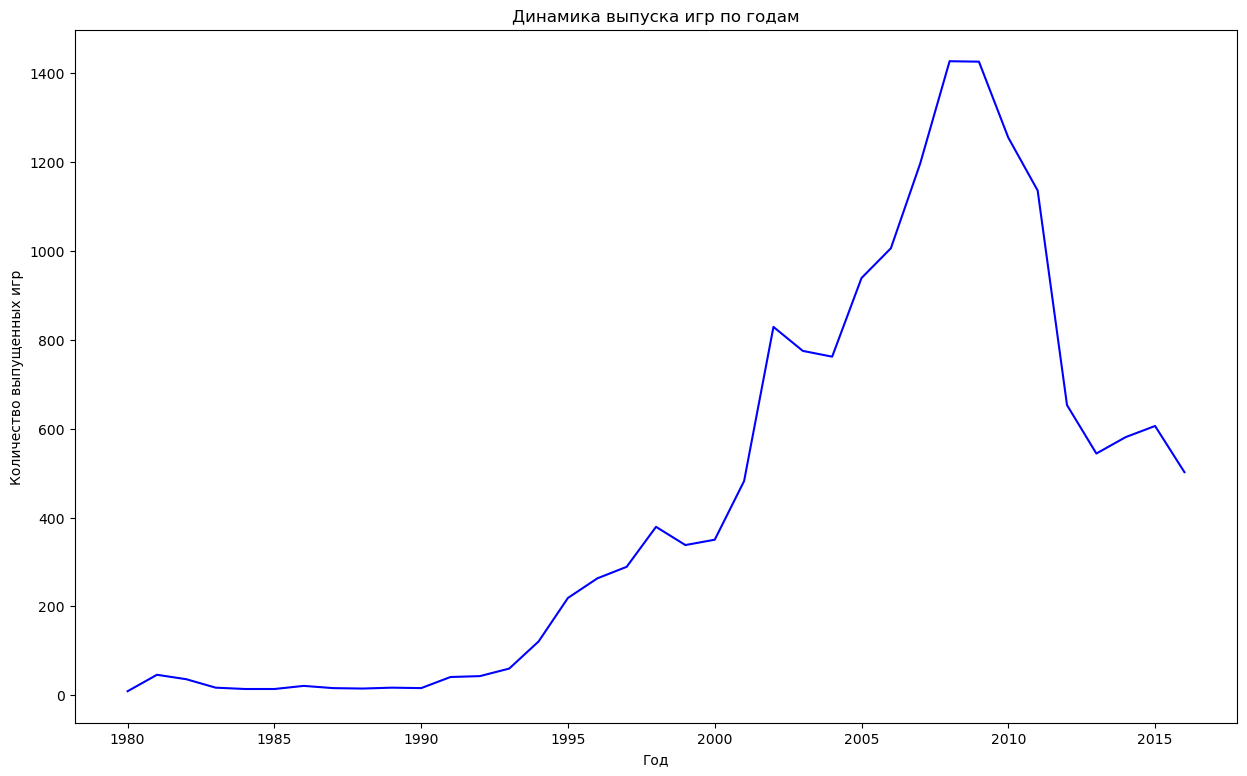

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: year_of_release, dtype: int64

In [17]:
schedule_by_year = data.pivot_table(index='year_of_release', values='general_sales', aggfunc='count')
plt.figure(figsize=(15, 9))
(sns.lineplot(data = schedule_by_year, x = schedule_by_year.index, y = 'general_sales', color = 'blue')
    .set(title = 'Динамика выпуска игр по годам', xlabel = 'Год', ylabel = 'Количество выпущенных игр'))
plt.show()

data.year_of_release.value_counts().head()

### Вывод
До 2000 года игр выходило не так много. Зато после 2000 начался активный рост выпуска и продажи игр. Он длился до 2009 года. На 2008 и 2009 год приходится пик графика, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно). Начиная с 2010 года количество выпускаемых игр значительно снизилось и остановилось на отметке в 502 игры. Данные за все периоды важны, благодаря этому можно проследить динамику разработки игр.


### Продажи по платформам

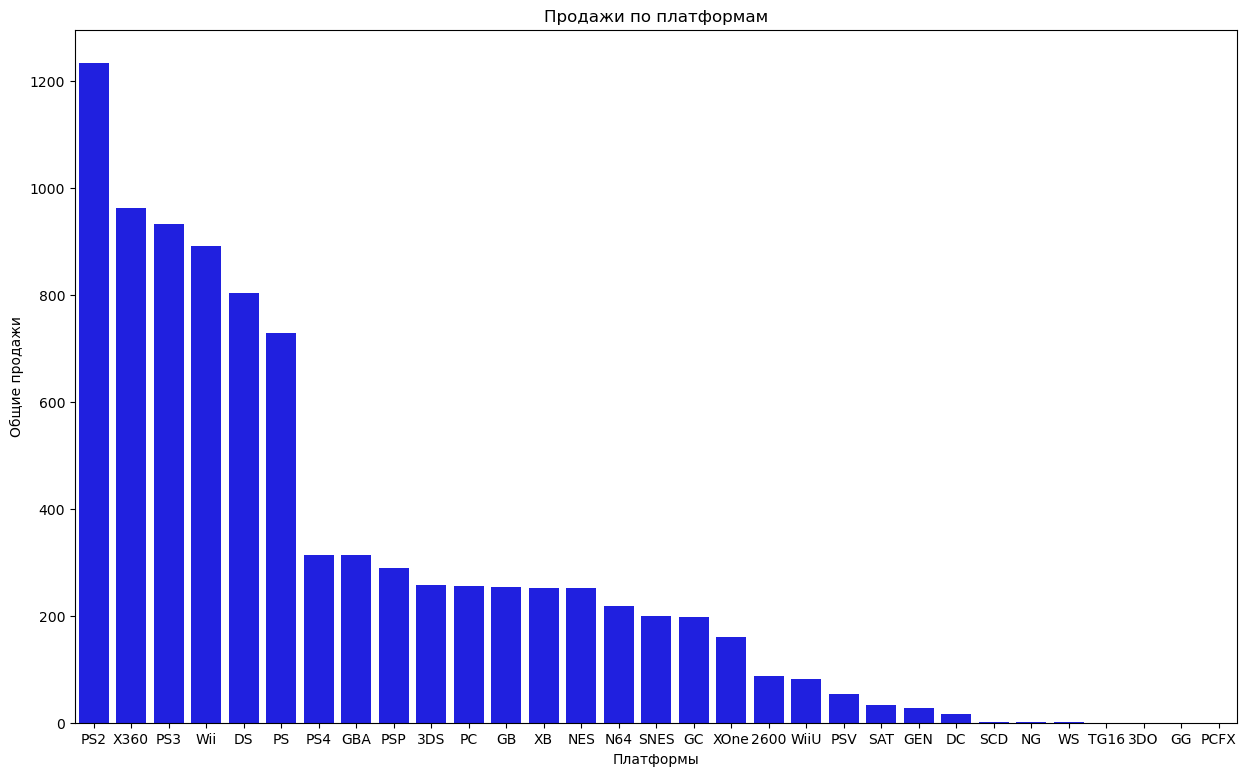

In [18]:
platform_sales = (data.pivot_table(index='platform', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

In [19]:
platform_sales

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Больше всего игр было продано для PS2.


PS2


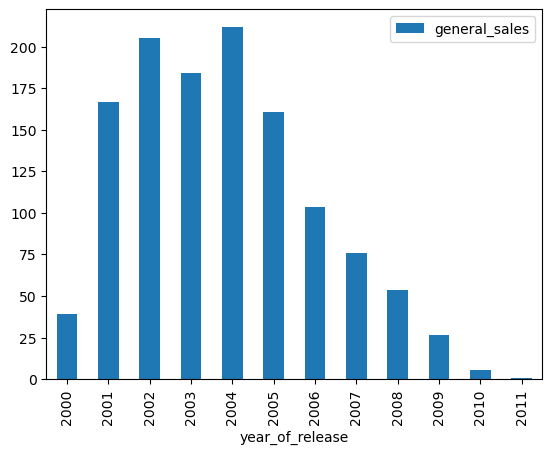

X360


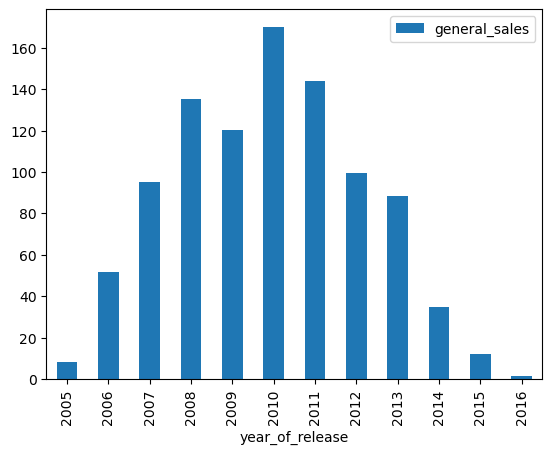

PS3


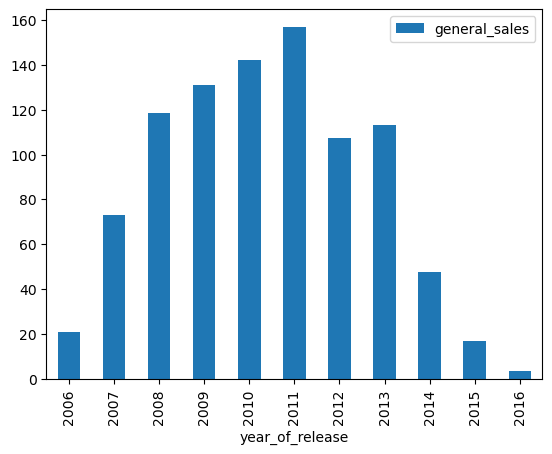

Wii


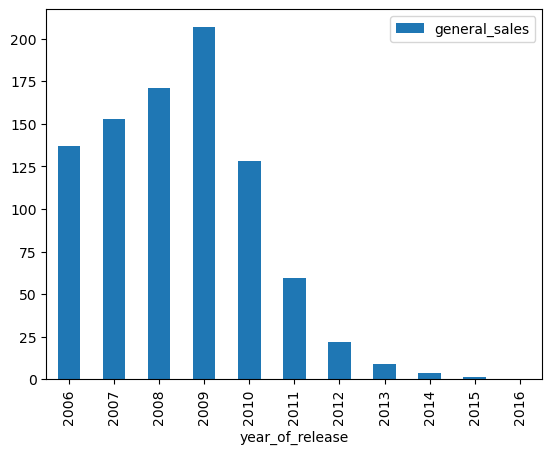

DS


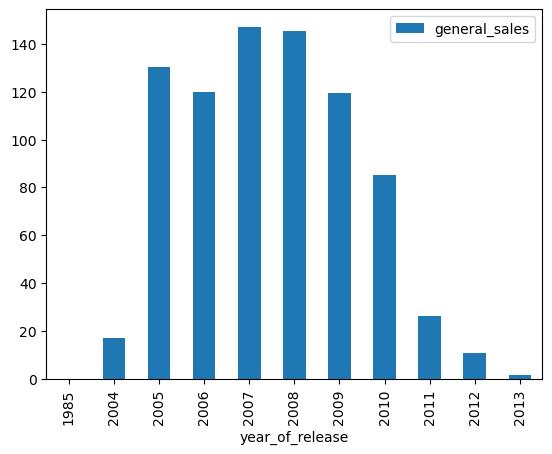

PS


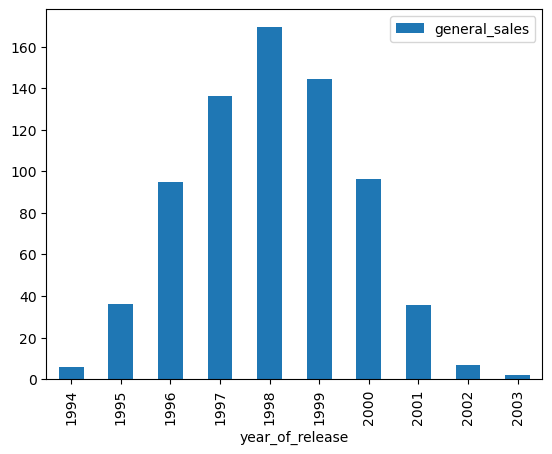

In [35]:
# создаем цикл для формирования графиков. Проверим продажи по годам первых 5 платформ

for platform in platform_sales.index[:6]:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

### Вывод
Наибольшее количество продаж было у игр для PS2. PlayStation 2 (успешен в 2002-2004 годах), Xbox360 (успешен в 2010-2011 годах), PlayStation 3 (успешен в 2008-2011 годах), Wii Nintendo (успешен в 2006-2009 годах), Nintendo DS (успешен в 2007-2008 годах), PlayStation (успешен в 1998-1999 годах). Остальные консоли не могут похвастаться таким объемом продаж. 

### Актуальные данные
Возьму игры за последние 3 года (актуальные) - 2014, 2015, 2016.

In [22]:
# создаю таблицу с актуальными годами
actual_games = data.query('year_of_release >= 2014').copy()

actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,tbd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,tbd,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,tbd,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01


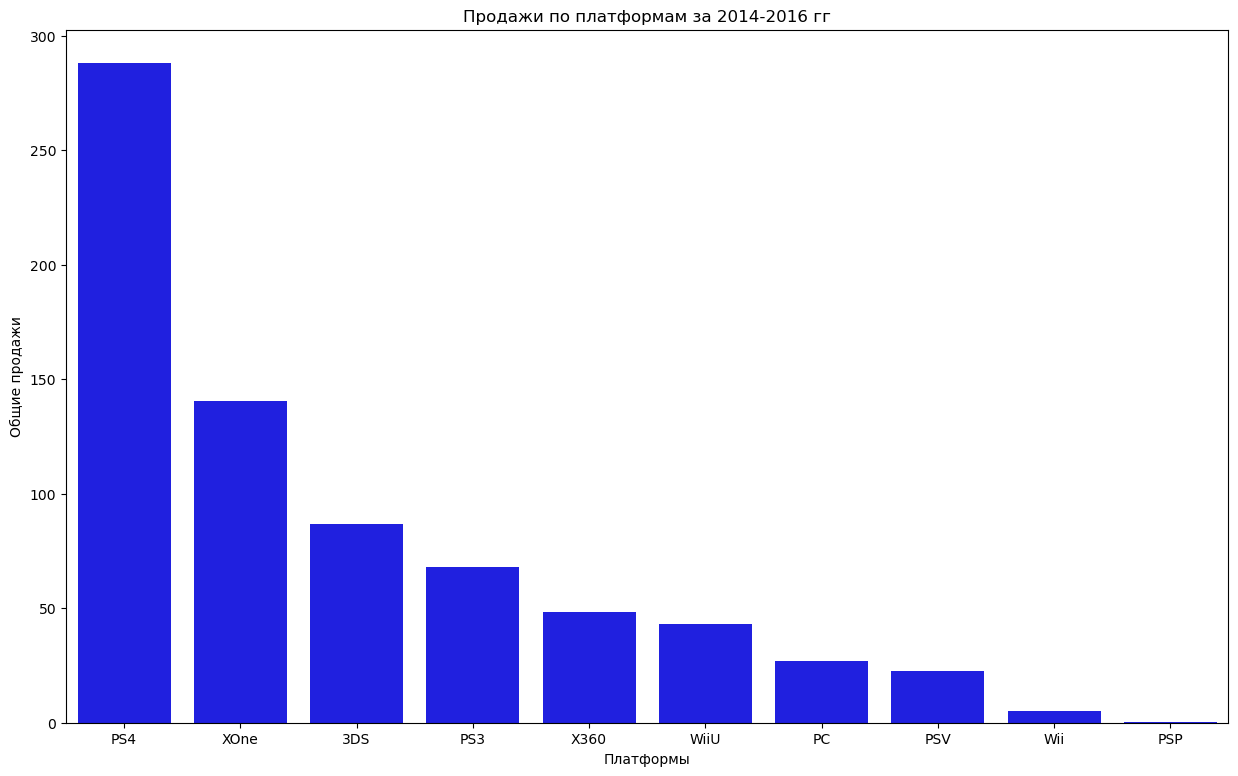

In [23]:
# Какие платформы лидируют по продажам, растут или падают?

actual_platform_sales = (
    actual_games
    .pivot_table(index='platform', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

 ### Вывод
Платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Раньше лидировала PS2, сейчас - PS4, на втором месте - XboxOne. PS4 и XboxOne являются привлекательнее остальных платформ.

###  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

PS4


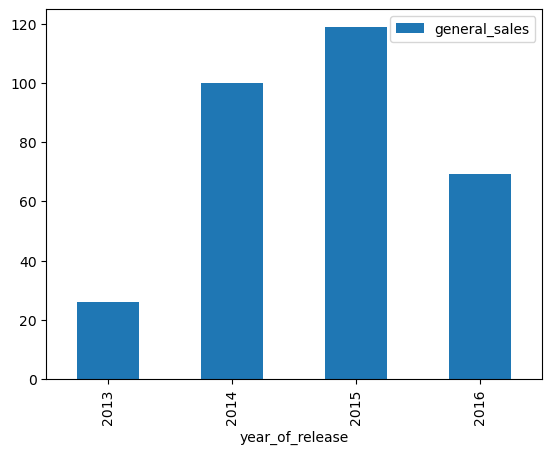

XOne


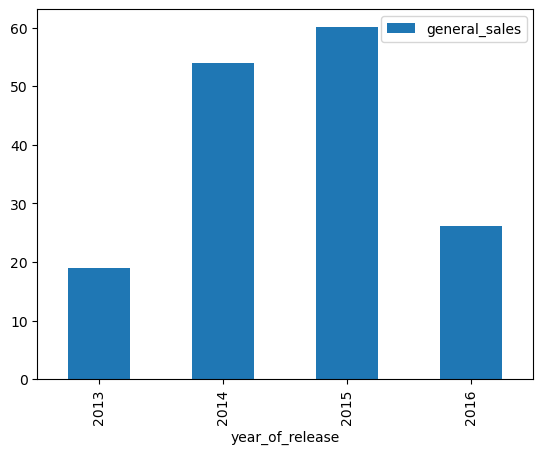

3DS


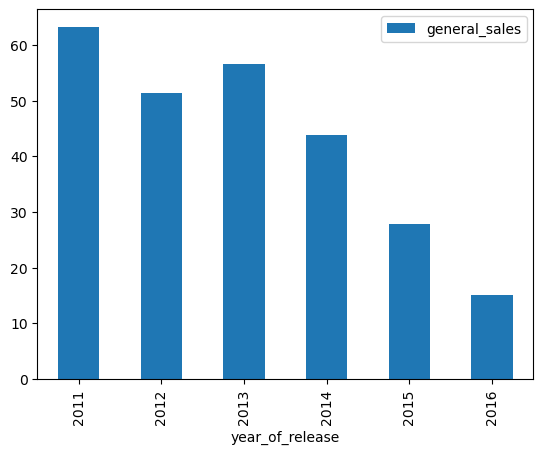

PS3


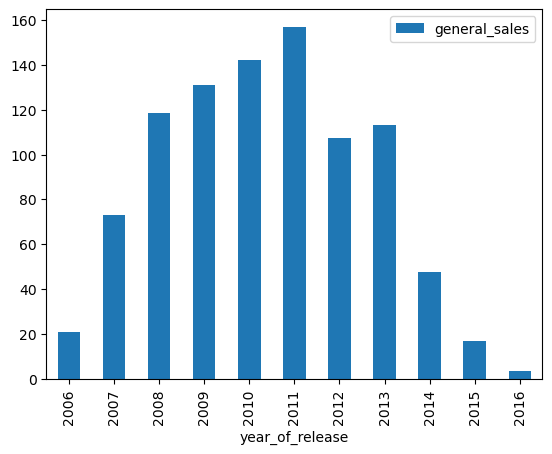

X360


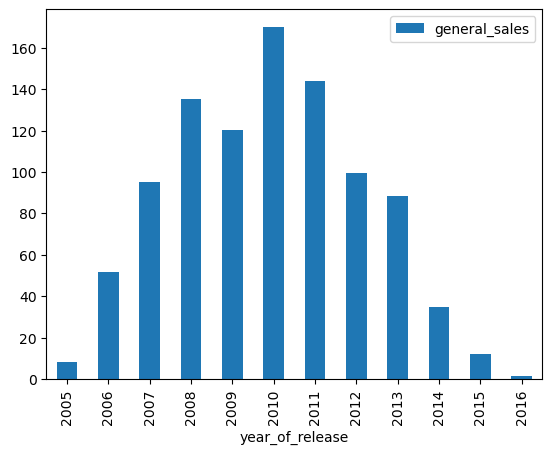

WiiU


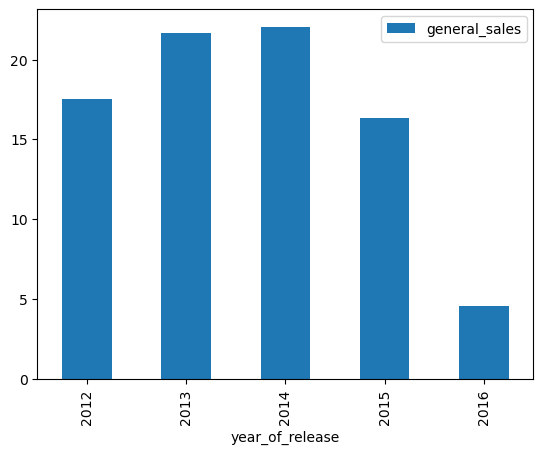

PC


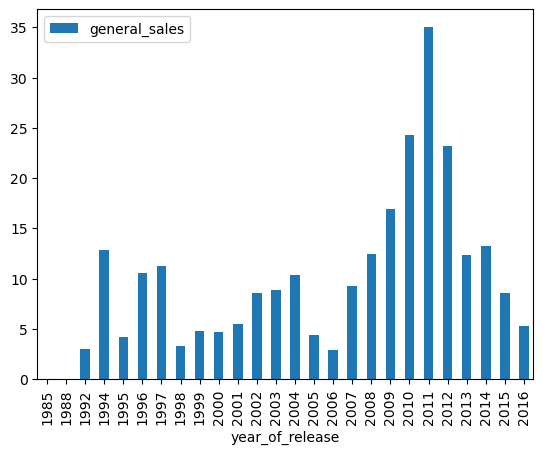

PSV


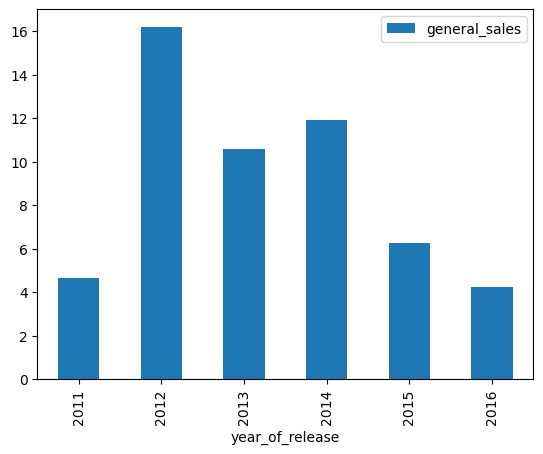

Wii


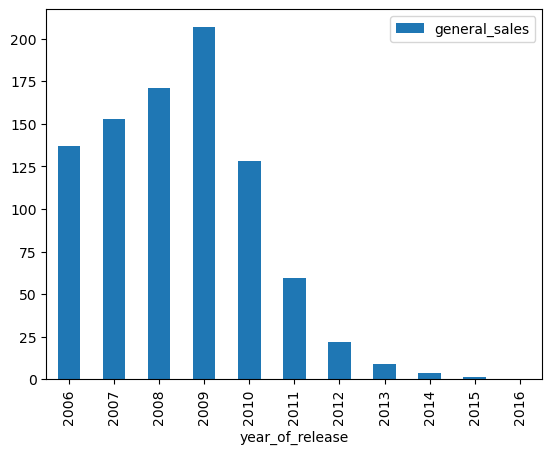

PSP


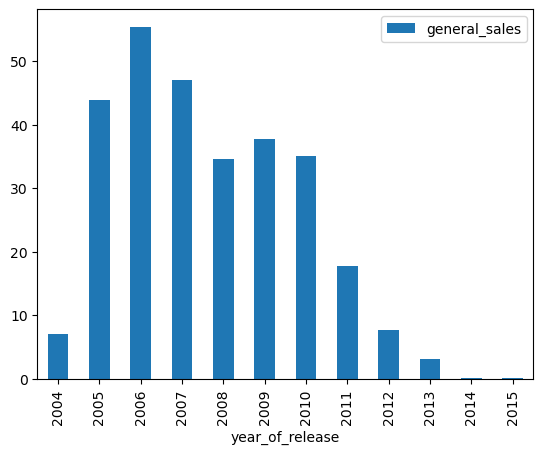

In [24]:
for platform in actual_platform_sales.index:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

### Вывод:

Наибольшее количество продаж было у игр для PS2. 

PlayStation 2 (успешен в 2002-2004 годах)
Xbox360 (успешен в 2010-2011 годах)
PlayStation 3 (успешен в 2008-2011 годах)
Wii Nintendo (успешен в 2006-2009 годах)
Nintendo DS (успешен в 2007-2008 годах)
PlayStation (успешен в 1998-1999 годах)

Остальные консоли не могут похвастаться таким объемом продаж. Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 
При этом видно, что из представленного ТОПа все платформы уже не являются актуальными.

In [25]:
# Таблица из потенциально прибыльных платформ

new_games = actual_games.query('platform not in ["3DS", "PS3", "X360", "PC", "PSV", "Wii", "PSP"]')

new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,tbd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,tbd,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,0.0,0.0,tbd,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,tbd,0.01


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

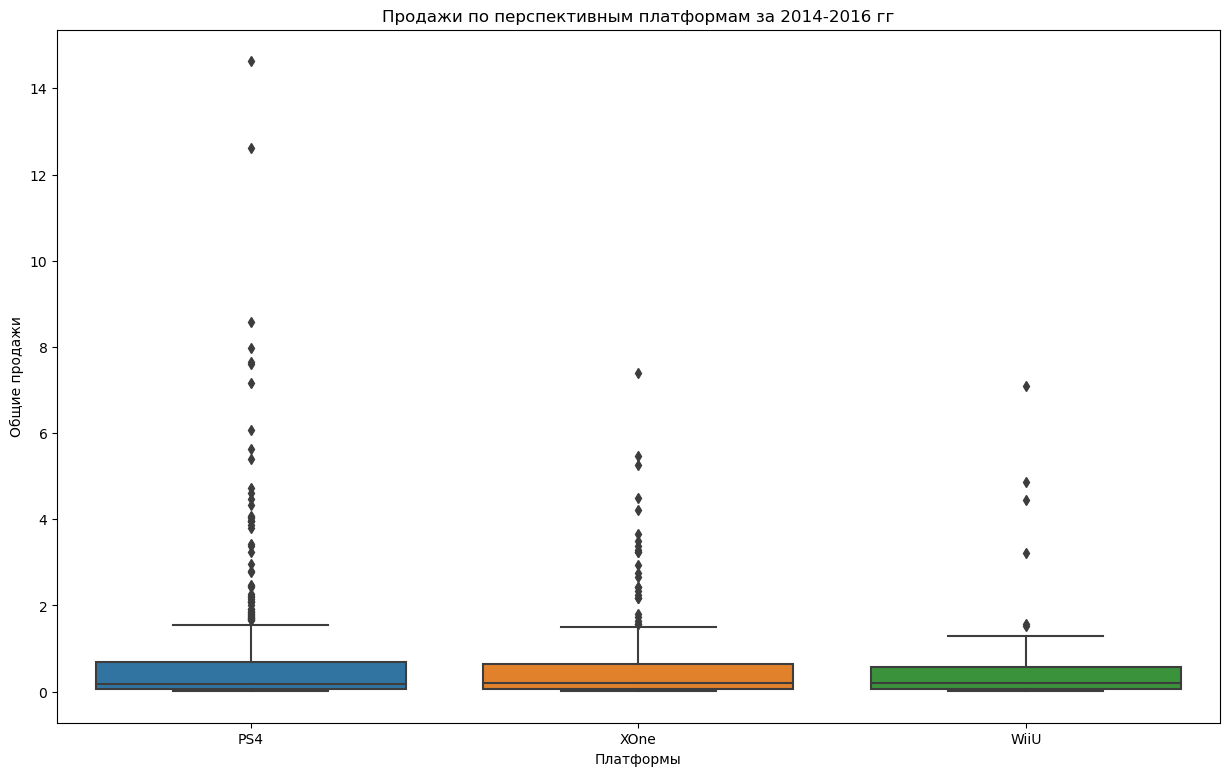

In [26]:
 plt.figure(figsize=(15, 9))
(sns.boxplot(data = new_games, y = 'general_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()

###  Вывод

Распределение продаж среди платформ примерно одинаковое и медиана продаж находится на примерно одном уровне (0,2 миллиона проданных копий). Также можно отметить значения, выходящие за пределы 3 квартиля, доходящие почти до 15 млн проданных копий. Поэтому не стоит отбрасывать те значения, что находятся за верхним усом ящика, так как это самые продаваемые игры. Данные платформы отлично подходят для дальнейших перспектив.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

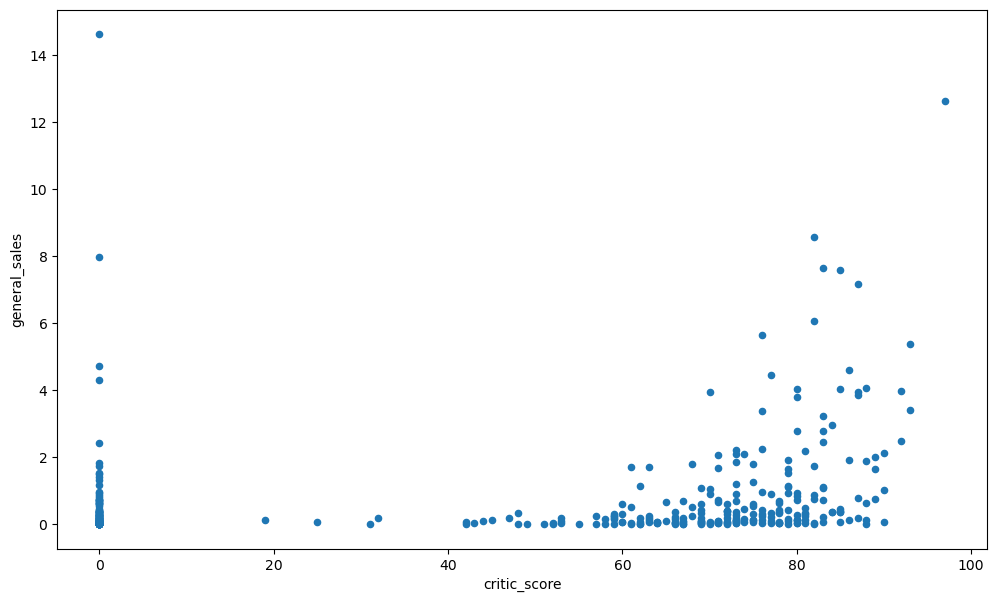

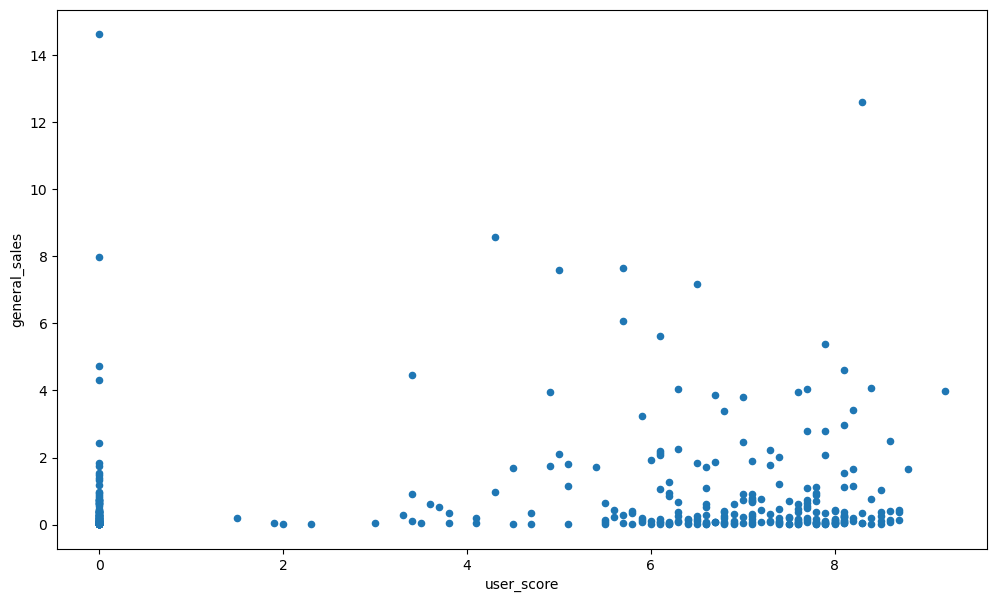

critic_score     0.211837
user_score       0.101448
general_sales    1.000000
Name: general_sales, dtype: float64


In [27]:
games_on_platform = new_games.query(
    'platform == "PS4" & critic_score != -10 & user_score != -10 ')
games_on_platform[games_on_platform['critic_score'] != '-10'].plot(
    kind='scatter', 
    x='critic_score', 
    y='general_sales', 
    figsize = (12,7))
games_on_platform[games_on_platform['user_score'] != '-10'].plot(
    kind='scatter', 
    x='user_score',
    y='general_sales', 
    figsize = (12,7))
plt.show()
print(games_on_platform[(games_on_platform['critic_score'] != '-10') 
                        & (games_on_platform['user_score'] != '-10')]
                       [['critic_score', 'user_score', 'general_sales']].corr()['general_sales'])

### Вывод
Корреляции между пользовательсикими оценками и продажами нет. Оценки критиков немного влияют на продажи игр - корелляция 40!

PS4


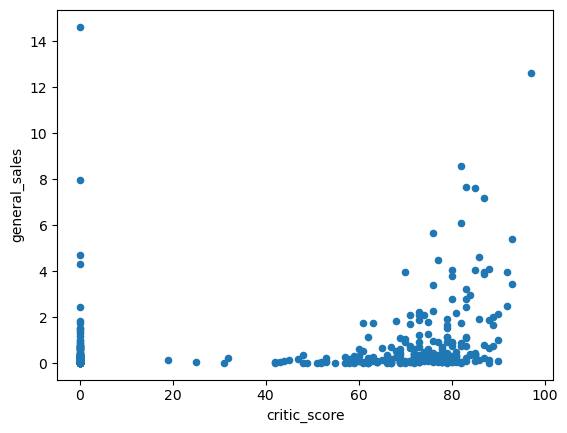

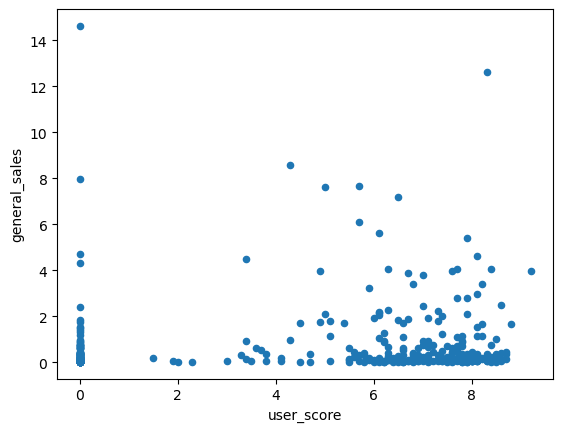

critic_score     0.211837
user_score       0.101448
general_sales    1.000000
Name: general_sales, dtype: float64
WiiU


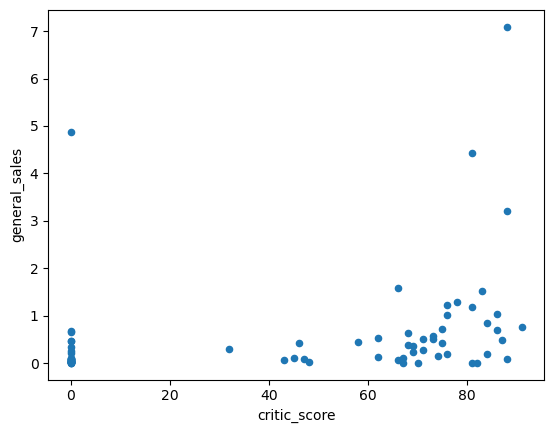

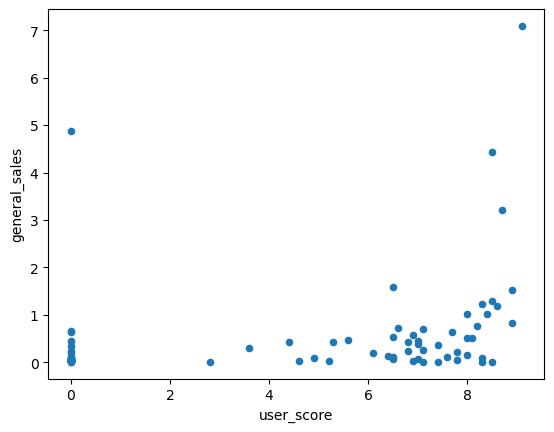

critic_score     0.292222
user_score       0.264631
general_sales    1.000000
Name: general_sales, dtype: float64
XOne


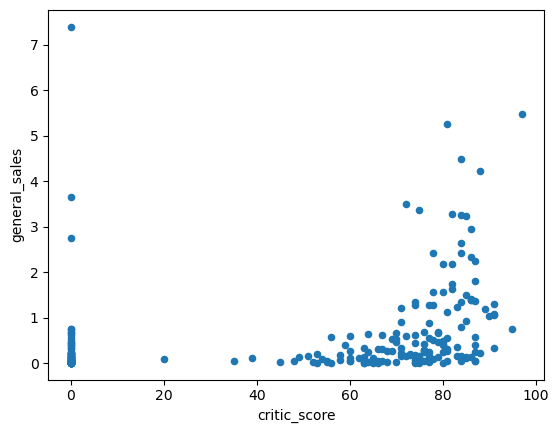

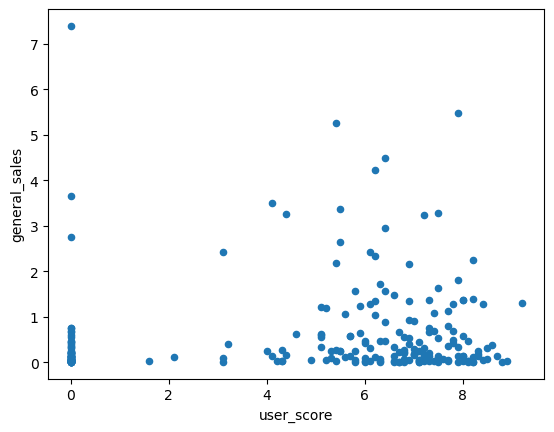

critic_score     0.272518
user_score       0.102074
general_sales    1.000000
Name: general_sales, dtype: float64


In [28]:
# Соотнесите выводы с продажами игр на других платформах.

for platform, games_on_platform in new_games.groupby('platform'):
    print('='*30)
    print(platform)
    games_on_platform[games_on_platform['critic_score'] != -10].plot(
        kind='scatter', 
        x='critic_score', 
        y='general_sales')
    games_on_platform[games_on_platform['user_score'] != -10].plot(
        kind='scatter',
        x='user_score',
        y='general_sales')
    plt.show()
    print(games_on_platform[(games_on_platform['critic_score'] != -10) 
                        & (games_on_platform['user_score'] != -10)]
                       [['critic_score', 'user_score', 'general_sales']].corr()['general_sales'])

WiiU. Корреляция между количеством покупок и оценками критиков и пользовательскими оценками существует, не очень большая но равная 37% для критиков и 41% для пользовательских оценок. Чем выше оценки пользователей и критиков, чем чаще покупают игры для WiiU. 

XOne. Корреляция между количеством покупок и оценками критиков равна 42%, это говорит о наличии корреляции, но не прямой зависимости. Корреляции с пользовательскими оценками не наблюдается.

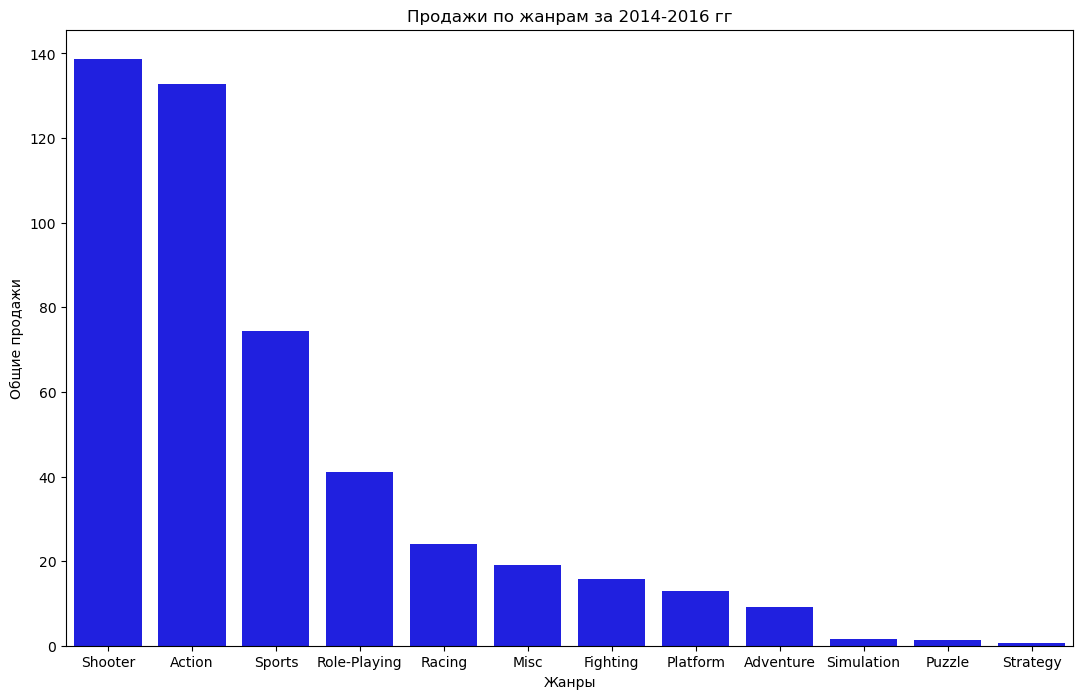

In [29]:
# Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
# Выделяются ли жанры с высокими и низкими продажами?

platform_sales_fresh = (
    new_games
    .pivot_table(index='genre', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)

plt.figure(figsize=(13, 8))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'general_sales', color = 'blue')
    .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

### Вывод
Самые прибыльные жанры являются шутеры и экшены. Значения их продаж почти доходят до 140 млн проданных копий. ТОП 4 можно отметить следующие жанры:

Шутеры
Экшены
Спортивные игры
Ролевые игры

### Составьте портрет пользователя каждого региона (NA, EU, JP)

C:\Users\Rock\AppData\Local\Temp\ipykernel_2800\3661122740.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\Rock\AppData\Local\Temp\ipykernel_2800\3661122740.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\Rock\AppData\Local\Temp\ipykernel_2800\3661122740.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_

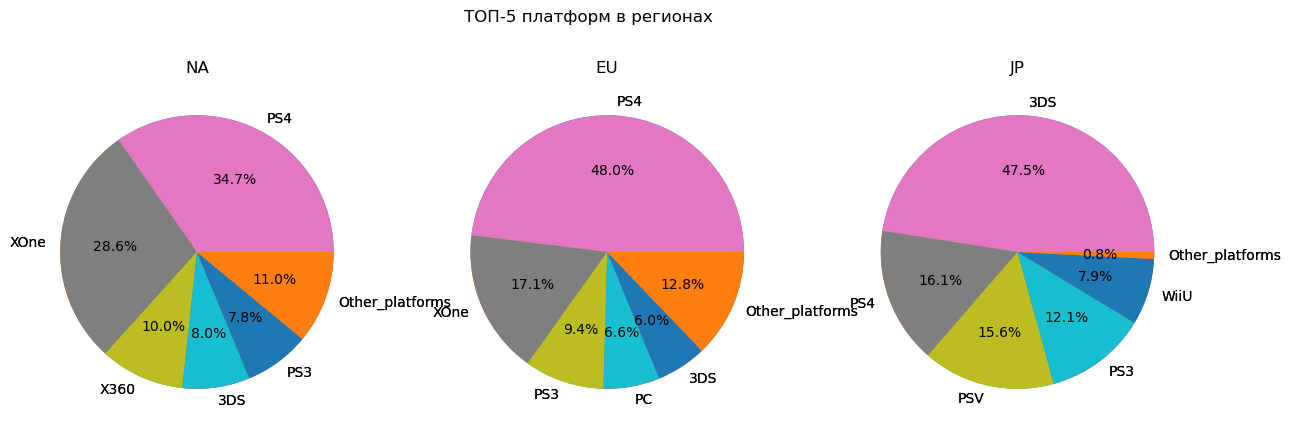

In [30]:
# список регионов
countries = actual_games.columns[4:7]
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # 5 самых продающих платформ
  df_i = (actual_games.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### Вывод

Разница в регионах есть. В Северной Америке и Европе на первом месте стоит платформа PS4, а второе место занимает с небольшим отрывом XOne. Япония по сравнению с другими регионами своеобразна, здесь на первом месте стоит 3DS, второе место занимает PS4, и на третьем находится PSV. 3 места среди Сев Америки и Европы тоже различаются, там находится X360 и PS3 соответсвенно.

### Самые популярные жанры (топ-5)

C:\Users\Rock\AppData\Local\Temp\ipykernel_2800\603213384.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\Rock\AppData\Local\Temp\ipykernel_2800\603213384.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\Rock\AppData\Local\Temp\ipykernel_2800\603213384.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, 

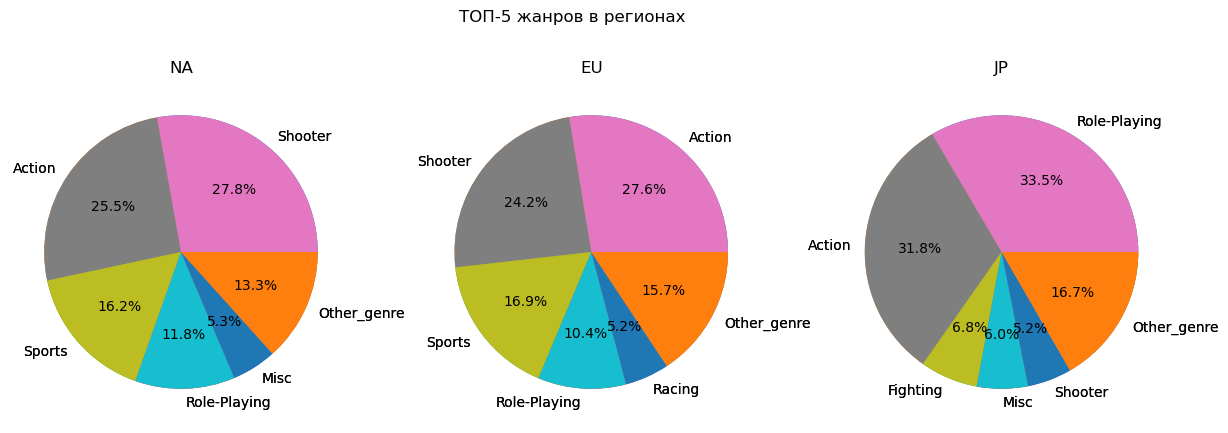

In [31]:
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # 5 самых продающих жанров
  df_i = (actual_games.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_genre
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### Вывод
На диаграммах видно, что первое место в Сев Америке занимают Шутеры, в Европе – это Экшен, а в Японии – Ролевые игры. 
Вторые места тоже не везде совпали,  у Сев Америки и Японии – это Экшен, а вот в Европе на втором месте Шутеры. Третье место в Сев Америке и Европе разделили спортивные игры, чего нельзя сказать про Японию, на третьем месте в этой стране популярен файтинг. Из данных диаграмм можно сделать вывод, что вкусовые предпочтения зависят от культуры и места проживания, так как во всех регионах показатели сильно разнятся.

 ### Влияет ли рейтинг ESRB на продажи в отдельном регионе

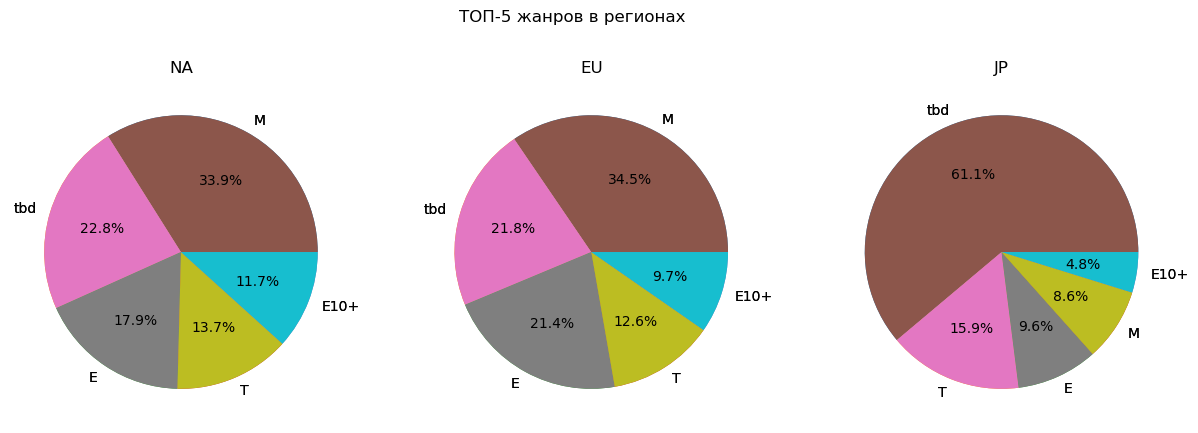

In [32]:
 # круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # влияние рейтинга
  df_i = (actual_games.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### Вывод
Рейтинг ESRB не сильно влияет на продажи, так как распределение среди рейтингов примерно одинаковое. Исключение составляет Япония, в данном регионе, видимо, пользователи любят кастомные игры, или игры своего собственного производства, так как компания ESRB в основном базируется на оценивании Американских и Канадских компаний. Если посмотреть на диаграммы Европы и Сев Америки повнимательнее, то можно выделить категорию М - для взрослых, она занимает большее место на рынке среди других игр. 

## Проверка гипотез

###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [36]:
# удаление значений-заглушек
score = actual_games[actual_games['user_score'] != -1]

print('Средний пользовательский рейтинг платформ Xbox One', round(score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(score.query('platform == "PC"')['user_score'].mean(),2))
print()


results = st.ttest_ind(
    score.query('platform == "XOne"')['user_score'], 
    score.query('platform == "PC"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ Xbox One 4.77
Средний пользовательский рейтинг платформ PC 5.09

p-значение: 0.31981092459798116
Не получилось отвергнуть нулевую гипотезу


### Вывод
Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

### Средние пользовательские рейтинги жанров Action и Sports разные
Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [34]:
print('Средний пользовательский рейтинг жанра экшен', round(score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра спортивных игр', round(score.query('genre == "Sports"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('genre == "Action"')['user_score'], 
    score.query('genre == "Sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра экшен 3.24
Средний пользовательский рейтинг жанра спортивных игр 4.12

p-значение: 0.0006646333120910831
Отвергаем нулевую гипотезу


### Вывод
Есть все основания отвергнуть нулевую гипотезу и не отвергнуть альтернативную.

## Общий вывод
 
Развитие игр с 1980 года по 2000 было слабым. В 2000 году мы видим активный рост количества игр на полках магазинов. Продолжался этот рост до 2009 года. На 2008-2009 год приходится пик графика, когда в продажу поступило больше всего игр (1427 и 1426 игр соответсвенно). Начиная с 2010 года количество выпускаемых игр значительно снизилось и остановилось на отметке в 502 игры.

В топ 6 конкурентов среди продаж вошли:
PlayStation 2 (успешен в 2002-2004 годах) Xbox360 (успешен в 2010-2011 годах) PlayStation 3 (успешен в 2008-2011 годах) Wii Nintendo (успешен в 2006-2009 годах) Nintendo DS (успешен в 2007-2008 годах) PlayStation (успешен в 1998-1999 годах)
Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 
При этом видно, что из представленного ТОПа все платформы уже не являются актуальными. 
Платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное второе место по продажам игр за 2014-2016 год занимает XboxOne. PS4 и XboxOne являются привлекательнее остальных платформ.

Потенциально прибыльные платформы:  PS4, XbOne, WiiU

Корреляция для PS4 (потенциально самой успешной платформы) между пользовательсикими оценками и продажами нет, так как значение почти нулевое. А вот оценки критиков не так, чтобы сильно, но влияют на продажи игр, об этом нам говорит корреляция в 40 процентов, чем выше оценка критиков, тем больше происходит продаж.

Самымии прибыльными жанрами оказались шутеры и экшены, которых было продано почти 140 млн.

ТОП 4 можно отметить следующие жанры:
Шутеры
Экшены
Спортивные игры
Ролевые игры
